<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 


STUDENT NAME: Parnian Taheri

STUDENT ID: 99106352

## Import 
>Put all of your imports for this file in the below cell.

In [2]:
### START CODE HERE ###
import pandas as pd
import numpy as np
import csv
import json
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
10 & 20 & 30\\
5 & 10 & 15\\
1 & 5 & 8
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers start from 15 and have steps of 5 to the end. The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
15 & 30 & 45\\
20 & 35 & 50\\
25 & 40 & 55
\end{array}\right)
$$ 

In [258]:
### START CODE HERE ###
A = np.array([[10,20,30],[5,10,15],[1,5,8]])
print("A:\n",A)

B=np.zeros((3,3,4))
for k in range(3):
    for j in range(3):
        for i in range(4):
            B[k][j][i] = k*5+15+j*15+i*45
print("\nB:\n",B[:,:,0])
### END CODE HERE ###

A:
 [[10 20 30]
 [ 5 10 15]
 [ 1  5  8]]

B:
 [[15. 30. 45.]
 [20. 35. 50.]
 [25. 40. 55.]]


## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [259]:
### START CODE HERE ###
B[:,:,3]=A
print(B[:,:,3])
print(B)
### END CODE HERE ###

[[10. 20. 30.]
 [ 5. 10. 15.]
 [ 1.  5.  8.]]
[[[ 15.  60. 105.  10.]
  [ 30.  75. 120.  20.]
  [ 45.  90. 135.  30.]]

 [[ 20.  65. 110.   5.]
  [ 35.  80. 125.  10.]
  [ 50.  95. 140.  15.]]

 [[ 25.  70. 115.   1.]
  [ 40.  85. 130.   5.]
  [ 55. 100. 145.   8.]]]


## Axis Swap 
>Swap the first(B[:, :, 0]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [262]:
### START CODE HERE ###
B[:, :, [3 , 0]]= B[:, :, [0 , 3]]
print(B)
### END CODE HERE ###

[[[ 10.  60. 105.  15.]
  [ 20.  75. 120.  30.]
  [ 30.  90. 135.  45.]]

 [[  5.  65. 110.  20.]
  [ 10.  80. 125.  35.]
  [ 15.  95. 140.  50.]]

 [[  1.  70. 115.  25.]
  [  5.  85. 130.  40.]
  [  8. 100. 145.  55.]]]


## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [267]:
### START CODE HERE ###
print("The original B:\n",B[:,:,1])
B = np.transpose(B,(1,0,2))
print("The transposed B:\n",B[:,:,1])
### END CODE HERE ###

The original B:
 [[ 60.  75.  90.]
 [ 65.  80.  95.]
 [ 70.  85. 100.]]
The transposed B:
 [[ 60.  65.  70.]
 [ 75.  80.  85.]
 [ 90.  95. 100.]]


## Matrix Multiplication
>Calculate the matrix multiplication of all slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2] \* B[:, :, 3]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [273]:
### START CODE HERE ###
print(B[:, :, 0])
print(B[:, :, 1])
M = B[:, :, 0] @ B[:, :, 1] @ B[:, :, 2] @ B[:, :, 3]
print("Resault:\n",M)
### END CODE HERE ###

[[10.  5.  1.]
 [20. 10.  5.]
 [30. 15.  8.]]
[[ 60.  65.  70.]
 [ 75.  80.  85.]
 [ 90.  95. 100.]]
Resault:
 [[3.93750000e+07 4.58516250e+07 5.23282500e+07]
 [8.85375000e+07 1.03100625e+08 1.17663750e+08]
 [1.34437500e+08 1.56550500e+08 1.78663500e+08]]


## Determinant
>Calculate the determinant of the array A and print it.

In [14]:
### START CODE HERE ###
det = np.linalg.det(A)
print(det)
### END CODE HERE ###

0.0


# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [18]:
### START CODE HERE ###
data = pd.read_csv("./IMDB-Movie-Data.CSV")
print(data.head())
### END CODE HERE ###

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [138]:
### START CODE HERE ###
movie = {
  "Actors": [],
  "Movies": []
}
data2 = pd.DataFrame(movie)
for i in data.Actors:
    x = i.split(", ")
    for j in x:
        if j in data2.Actors.values:
            data2["Movies"][data2["Actors"].values == j] = data2["Movies"][data2["Actors"].values == j] + 1
        else:
            movie2 = {
                "Actors": [j],
                "Movies": [1]
            }
            data3 = pd.DataFrame(movie2)
            data2 = data2.append(data3)
sorted_data1 = data2.sort_values(by=['Movies'],ascending=False)    
sorted_data2 = data2.sort_values(by=['Actors'])   
print("Number of movies for each Actors/Actresses:\n",data2.head())
print("\nSorted data by number of movies in descending order:\n ",sorted_data1)
print("\nSorted data by their name in ascending order:\n ",sorted_data2)
### END CODE HERE ###

/var/folders/n2/_w97mv7j5vsc0rlc4hmz59qh0000gn/T/ipykernel_19222/2253866355.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if j in data2.Actors.values:
/var/folders/n2/_w97mv7j5vsc0rlc4hmz59qh0000gn/T/ipykernel_19222/2253866355.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Movies"][data2["Actors"].values == j] = data2["Movies"][data2["Actors"].values == j] + 1


Number of movies for each Actors/Actresses:
            Actors  Movies
0     Chris Pratt     7.0
0      Vin Diesel     7.0
0  Bradley Cooper    10.0
0     Zoe Saldana     6.0
0    Noomi Rapace     5.0

Sorted data by number of movies in descending order:
                            Actors  Movies
0                  Mark Wahlberg    15.0
0                      Brad Pitt    13.0
0                   Hugh Jackman    13.0
0                 Christian Bale    13.0
0             Michael Fassbender    12.0
..                           ...     ...
0     Tiffany Haddish,Method Man     1.0
0                   Jordan Peele     1.0
0   Willem Dafoe,Samantha Morton     1.0
0                   Lynn Collins     1.0
0      Robbie Amell,Cheryl Hines     1.0

[2015 rows x 2 columns]

Sorted data by their name in ascending order:
                     Actors  Movies
0                 50 Cent     1.0
0           A.C. Peterson     1.0
0             AJ Michalka     1.0
0              Aamir Khan     4.0
0      

## Score Histogram
>Draw the histogram of metascores and ratings. 

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

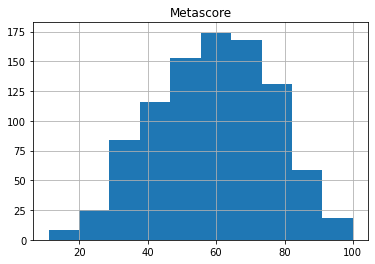

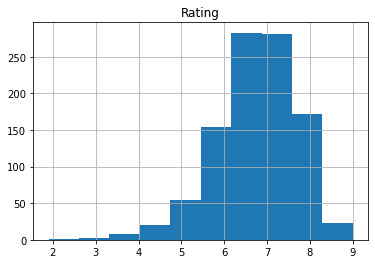

In [115]:
### START CODE HERE ###
data.hist(column = "Metascore")
data.hist(column = "Rating")
### END CODE HERE ###

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [139]:
### START CODE HERE ###
temp = data[["Rating","Votes","Metascore"]]
temp.corr()
### END CODE HERE ###

,Rating,Votes,Metascore
Rating,1.000000,0.511537,0.631897
Votes,0.511537,1.000000,0.325684
Metascore,0.631897,0.325684,1.000000


#### As we can see the correlation between "Metascore" and "Rating" and between "Votes" and "Rating" is more than 0.5, therefore, we can conclude that there is a meaningful relation between them. However the correlation between "Metascore" and  "Votes" is inconsiderable.

# Question 3

## File
> Craet a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [171]:
### START CODE HERE ###
txtFile = open("Name_actors.txt",'w+')
txtFile.writelines(data2["Actors"]+"\n")
txtFile.seek(0) 
print(txtFile.read())

#csvFile = open("IMDB-Movie-Data.csv","w")
#header = ["Actors"]
#writer = csv.writer(csvFile)
#writer.writerow(header)
#writer.writerow(txtFile)
### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

      Rank  Title  Genre  Description  Director  Actors  Runtime (Minutes)  \
Year                                                                         
2006    44     44     39           44        44      44                 29   
2007    53     53     40           53        51      53                 35   
2008    52     52     39           52        51      52                 37   
2009    51     51     37           51        51      51                 36   
2010    60     60     41           60        60      60                 32   
2011    63     63     41           63        63      63                 43   
2012    64     64     44           64        64      64                 44   
2013    91     91     61           91        89      91                 47   
2014    98     98     62           98        97      98                 54   
2015   127    127     74          127       127     127                 54   
2016   297    297    105          297       290     297         

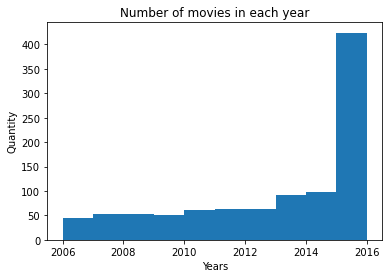

In [197]:
### START CODE HERE ###
print(data.groupby(['Year']).agg('nunique'))
plt.hist(data["Year"])
plt.xlabel("Years")
plt.ylabel("Quantity")
plt.title("Number of movies in each year")
plt.show()

### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 200 Hz. 
> set the x_label, y_label and title for your plot.

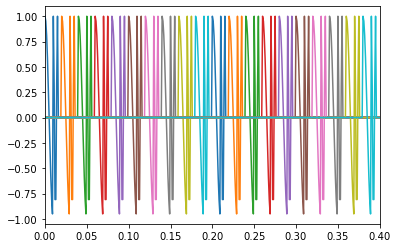

In [555]:
### START CODE HERE ###
t = np.arange(0,10-0.001,0.001)
c = np.zeros((20,9999))
d = np.zeros(20)
for i in range(20):
    c[i] = np.cos(2*np.pi*50*t)*(t/0.001>=0+20*i)*(t/0.001<10+20*i) + np.cos(2*np.pi*200*t)*(t/0.001>=10+20*i)*(t/0.001<=15+20*i)
    plt.plot(t,c[i])
    plt.xlim([0,0.4])
### END CODE HERE ###